In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# load data and preprocessing labels
fn = "data_temperature/서울경기.csv"
c = "avg"

df = pd.read_csv(fn)
df = df.dropna()
df['date'] = df.date.apply(lambda x: pd.Timestamp(x))
df['year'] = df.date.apply(lambda x: x.year)
df['month'] = df.date.apply(lambda x:x.month)
df['season'] = 4
df.loc[(df.month>=3)&(df.month<=5),'season'] = 1
df.loc[(df.month>=6)&(df.month<=8),'season'] = 2
df.loc[(df.month>=9)&(df.month<=11),'season'] = 3


gb = dict(list(df.groupby('year')))

years = list(range(1974,2023,1))

In [25]:
# avg per month 
monthly = df.groupby(['year','month']).mean()[['avg']]
pv = monthly.pivot_table(index='month',columns = 'year')['avg']

fig = px.imshow(
    pv, 
    color_continuous_scale='RdBu_r'
    )

fig.update_xaxes(side="top")
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(1, 13)),
        ticktext = list(range(1, 13))
    ),
    legend=dict(
        orientation="h"
    ))


In [45]:
# min winter months
monthly = df.groupby(['year','month']).min()[['min']]
pv = monthly.pivot_table(index='month',columns = 'year')['min']
pv = pv.loc[[1,2,3,4,10,11,12]]
fig = px.imshow(
    pv, 
    color_continuous_scale='RdBu_r'
    )

fig.update_xaxes(side="top")
fig.update_layout(
    legend=dict(
        orientation="h"
    ))


In [46]:
# summer months
monthly = df.groupby(['year','month']).max()[['max']]
pv = monthly.pivot_table(index='month',columns = 'year')['max']
pv = pv.loc[[4,5,6,7,8,9,10]]
fig = px.imshow(
    pv, 
    color_continuous_scale='RdBu_r'
    )

fig.update_xaxes(side="top")
fig.update_layout(
    legend=dict(
        orientation="h"
    ))


<AxesSubplot:>

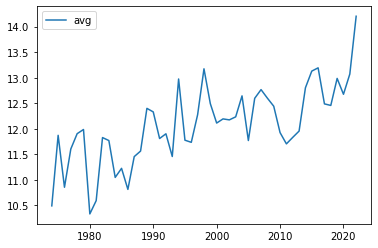

In [51]:
res=pd.DataFrame(columns=["date","max","avg"])
for year in years:
    temp = gb[year].sort_values('date').reset_index()
    idx = temp[c].idxmax()
    dt = temp.loc[idx,'date'].month * 100 + temp.loc[idx,'date'].day

    res.loc[year] = [dt,temp[c].max(),temp[c].mean()]
res[['avg']].plot()


<AxesSubplot:>

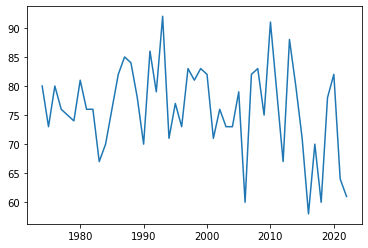

In [53]:
# monthly average and stdev
events = pd.DataFrame(columns=['s1','s2','mean','std'])
for year in years:
    temp = gb[year].sort_values('date').reset_index()
    mean = temp[c].mean()
    std=temp[c].std()
    s1 = (temp[c]>(mean+std)).sum()
    s2 = (temp[c]>(mean+std*2)).sum()
    
    events.loc[year] = [s1,s2,mean,std]
events['s1'].plot()


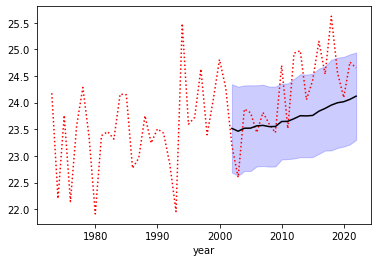

In [57]:
seasonal = df.groupby(['year','season']).mean()[c]
fig2,ax2 = plt.subplots()
summer = seasonal.loc[:,2]
standard = summer.rolling(30).mean()
dev = summer.rolling(30).std()
summer.plot(color='red',linestyle='dotted')
standard.plot(color='black')
ax2.fill_between(standard.index,standard+dev,standard-dev,color='blue',alpha=0.2)


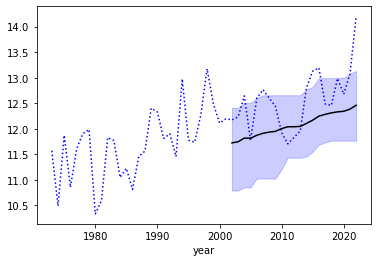

In [56]:
yearlysum=df.groupby('year').mean()[c]
standard = yearlysum.rolling(30).mean()
dev = yearlysum.rolling(30).std()
upper = yearlysum.rolling(30).quantile(0.9)
lower = yearlysum.rolling(30).quantile(0.1)
fig,ax = plt.subplots()
yearlysum.plot(color='blue',linestyle='dotted')
standard.plot(color='black')
ax.fill_between(standard.index,upper,lower,color='blue',alpha=0.2)

